In [209]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [210]:
sub_path='/kaggle/input/playground-series-s3e17/sample_submission.csv'
train_path='/kaggle/input/playground-series-s3e17/train.csv'
test_path='/kaggle/input/playground-series-s3e17/test.csv'


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [212]:
sub_df=pd.read_csv(sub_path)
train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

#  **1.Exploratory Data Analysis** 

In [213]:
train_df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [214]:
train_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [215]:
train_df.isnull().any()

id                         False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

In [216]:
train_df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [217]:
train_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
136424    False
136425    False
136426    False
136427    False
136428    False
Length: 136429, dtype: bool

In [218]:
train_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [219]:
new_train=train_df.drop(['id','Product ID'], axis=1)
new_test=test_df.drop('Product ID', axis=1)

<Axes: ylabel='count'>

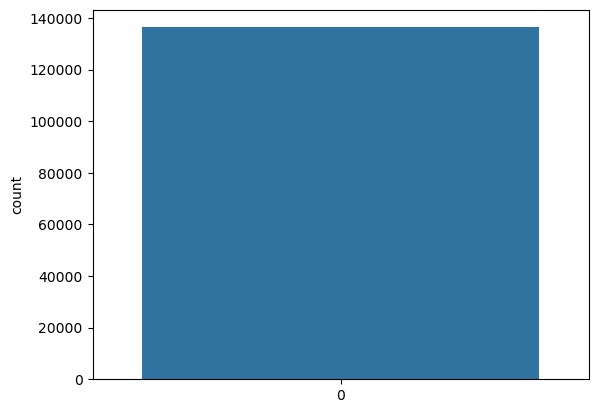

In [220]:
sns.countplot(new_train['Machine failure'])

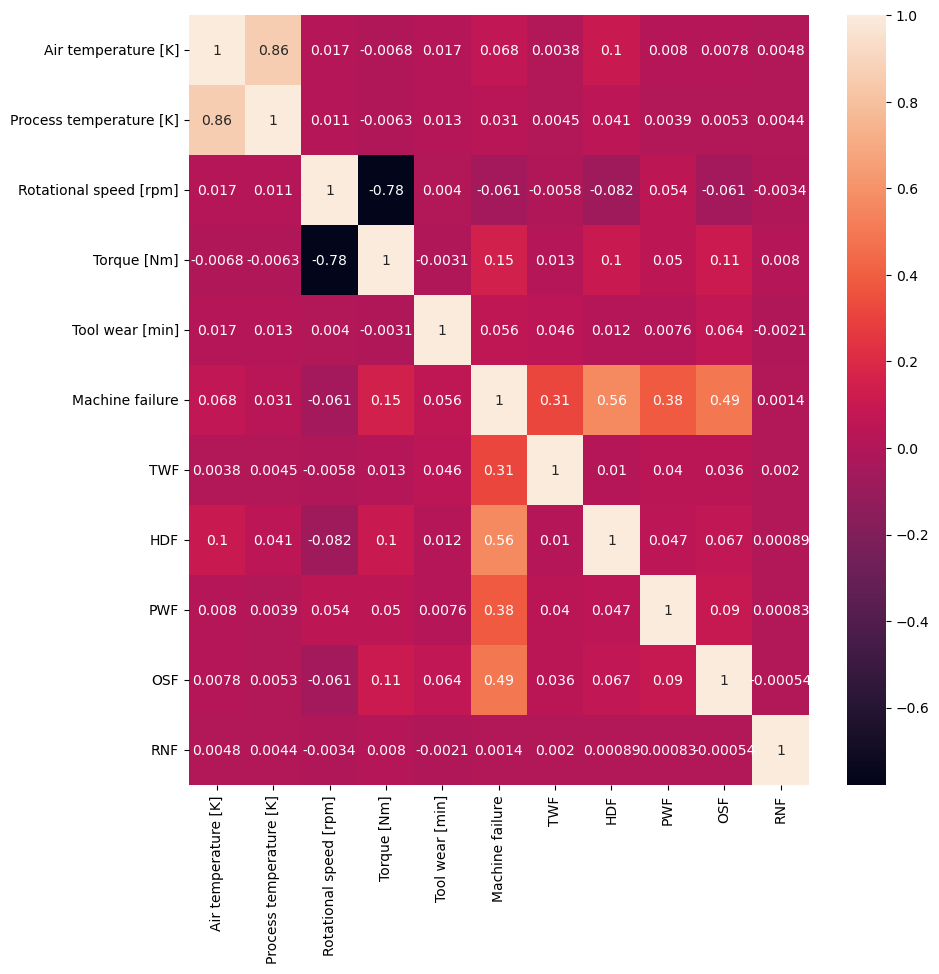

In [221]:
corr = new_train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()


# **Preprocessing**

In [222]:
new_train=pd.get_dummies(new_train)
new_test=pd.get_dummies(new_test)




In [223]:
new_test

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,136429,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,1,0
1,136430,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,1,0
2,136431,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,1,0
3,136432,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0,1
4,136433,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,302.3,311.4,1484,40.4,15,0,0,0,0,0,0,1,0
90950,227379,297.9,309.8,1542,33.8,31,0,0,0,0,0,0,1,0
90951,227380,295.6,306.2,1501,41.4,187,0,0,0,0,0,0,1,0
90952,227381,298.1,307.8,1534,40.3,69,0,0,0,0,0,0,1,0


In [224]:
new_train.columns = new_train.columns.str.replace('[\[\]_]', '')
new_test.columns = new_test.columns.str.replace('[\[\]_]', '')

# **Modeling**

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [226]:
X=new_train.drop('Machine failure',axis=1)
y=new_train['Machine failure']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler



In [227]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()



___

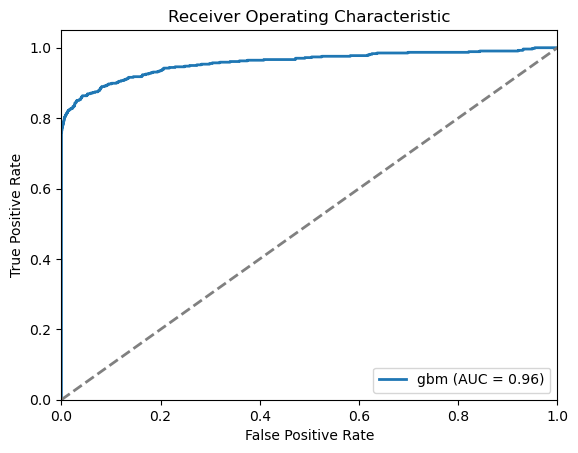

AUC-ROC score for gbm is : 0.96


In [228]:
gbm=LGBMClassifier()
gbm.fit(X_train, y_train)
y_pred_proba = gbm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr, tpr, model_name='gbm')   
auc_roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC score for gbm is : {auc_roc_score:.2f}")

___

In [229]:
test_df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [230]:
# test2=new_test.drop('id',axis=1)
# # Make predictions on the validation data
# y_pred_proba = gbm.predict_proba(test2)[:, 1]

# # Create a DataFrame for the submission
# submission_df = pd.DataFrame({'id': new_test['id'], 'Machine failure': y_pred_proba})

# # Save the submission file
# submission_df.to_csv('submission.csv', index=False)

In [231]:
# submission_df

,id,Machine failure
0,136429,0.000230
1,136430,0.003930
2,136431,0.000131
3,136432,0.000345
4,136433,0.000608
...,...,...
90949,227378,0.000327
90950,227379,0.000906
90951,227380,0.000211
90952,227381,0.000146


In [232]:
# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMClassifier

# # Define the parameter grid for tuning
# param_grid = {
#     'learning_rate': [0.1, 0.05, 0.01],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 63, 127]
# }

# # Create the LGBMClassifier model
# model = LGBMClassifier()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best AUC-ROC Score: ", grid_search.best_score_)


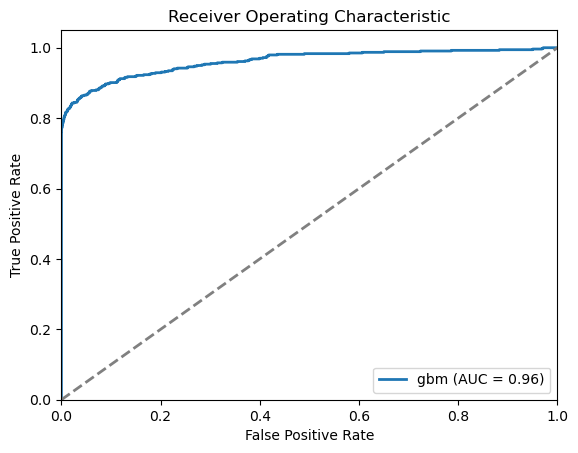

AUC-ROC score for gbm2 is : 0.9612


In [233]:
gbm2=LGBMClassifier(learning_rate=0.1, max_depth=6,n_estimators=100, num_leaves=31)
gbm2.fit(X_train, y_train)
y_pred_proba = gbm2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr, tpr, model_name='gbm')   
auc_roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC score for gbm2 is : {auc_roc_score:.4f}")

In [234]:
test2=new_test.drop('id',axis=1)
# Make predictions on the validation data
y_pred_proba = gbm2.predict_proba(test2)[:, 1]

# Create a DataFrame for the submission
submission_df = pd.DataFrame({'id': new_test['id'], 'Machine failure': y_pred_proba})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)